<a href="https://colab.research.google.com/github/chaymabaya/reconnaissace-faciale/blob/main/emotion_facial_with_mini_xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip tensorflow.contrib.framework.python.ops.variables

ERROR: unknown command "tensorflow.contrib.framework.python.ops.variables"


In [ ]:
!pip install keras

In [ ]:
!wget https://github.com/oarriaga/face_classification/raw/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5 -O mini_xception.h5


--2025-04-21 19:31:14--  https://github.com/oarriaga/face_classification/raw/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/oarriaga/face_classification/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5 [following]
--2025-04-21 19:31:14--  https://raw.githubusercontent.com/oarriaga/face_classification/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 872856 (852K) [application/octet-stream]
Saving to: ‘mini_xception.h5’

mini_xcep

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

# Charger le modèle
model = load_model('mini_xception.h5', compile=False)

# Étiquettes des émotions
emotion_labels = ['Colère', 'Dégoût', 'Peur', 'Joie', 'Tristesse', 'Surprise', 'Neutre']

# Charger une image en niveaux de gris et la redimensionner
img = cv2.imread('chemin/vers/image.jpg', cv2.IMREAD_GRAYSCALE)
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg -O test.jpg
img = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)
face = cv2.resize(img, (64, 64))
face = face.astype('float32') / 255.0
face = np.expand_dims(face, axis=0)
face = np.expand_dims(face, axis=-1)

# Prédire l'émotion
prediction = model.predict(face)
emotion_idx = np.argmax(prediction)
emotion = emotion_labels[emotion_idx]

print(f"Émotion prédite : {emotion}")



--2025-04-21 19:38:33--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91814 (90K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  89.66K  --.-KB/s    in 0.02s   

2025-04-21 19:38:34 (3.65 MB/s) - ‘test.jpg’ saved [91814/91814]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
Émotion prédite : Peur


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


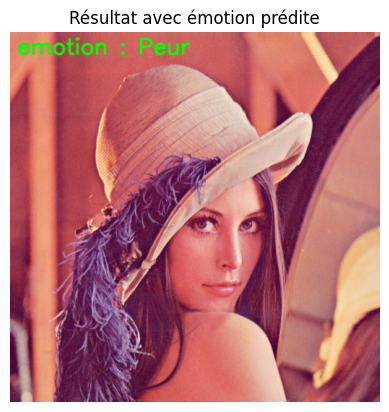

In [ ]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

# Charger le modèle
model = load_model('mini_xception.h5', compile=False)

# Labels des émotions (en fonction de l’ordre du dataset FER2013)
emotion_labels = ['Colère', 'Dégoût', 'Peur', 'Joie', 'Tristesse', 'Surprise', 'Neutre']

# Lire l'image (en niveaux de gris pour le modèle + en couleur pour l'affichage)
gray_img = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)
color_img = cv2.imread('test.jpg')  # Pour affichage

# Redimensionner et préparer pour le modèle
face = cv2.resize(gray_img, (64, 64))
face = face.astype('float32') / 255.0
face = np.expand_dims(face, axis=0)
face = np.expand_dims(face, axis=-1)

# Prédire l’émotion
prediction = model.predict(face)
emotion_idx = np.argmax(prediction)
emotion = emotion_labels[emotion_idx]

# Écrire l’émotion sur l’image couleur
cv2.putText(
    color_img,
    f'emotion : {emotion}',
    (10, 30),  # Position du texte
    cv2.FONT_HERSHEY_SIMPLEX,
    1,  # Taille
    (0, 255, 0),  # Couleur (vert)
    2,  # Épaisseur
    cv2.LINE_AA
)

# Convertir BGR en RGB pour affichage avec matplotlib
color_img_rgb = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

# Afficher l’image
plt.imshow(color_img_rgb)
plt.axis('off')
plt.title("Résultat avec émotion prédite")
plt.show()


--2025-05-18 12:13:44--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.7’

haarcascade_frontal 100%[===================>] 908.33K  3.44MB/s    in 0.3s    

2025-05-18 12:13:45 (3.44 MB/s) - ‘haarcascade_frontalface_default.xml.7’ saved [930127/930127]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


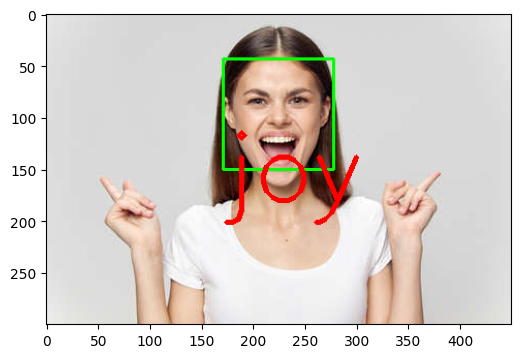

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# Charger le modèle d’émotion
model = load_model('mini_xception.h5', compile=False)
emotion_labels = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']

# Télécharger le classificateur Haar (détecteur de visage)
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

# Charger le classificateur de visage
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Charger l'image en niveaux de gris et en couleur
img = cv2.imread('test.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Détection des visages
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

# Pour chaque visage détecté
for (x, y, w, h) in faces:
    # Extraire le visage détecté
    face = gray[y:y+h, x:x+w]
    face = cv2.resize(face, (64, 64))
    face = face.astype('float32') / 255.0
    face = np.expand_dims(face, axis=0)
    face = np.expand_dims(face, axis=-1)

    # Prédiction de l’émotion
    prediction = model.predict(face)
    emotion_idx = np.argmax(prediction)
    emotion = emotion_labels[emotion_idx]

    # Dessiner un rectangle autour du visage
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    # Afficher l’émotion au-dessus du rectangle
    cv2.putText(img, emotion, (x,  y + h + 30), cv2.FONT_HERSHEY_SIMPLEX, 3, (0,0,255), 3)

# Convertir BGR en RGB pour affichage avec matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Afficher le résultat
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.show()
